## Brexit Data From Twitter

Here, we take a look at Brexit related top-tweets in Twitter, dates ranging from June 01, 2016 to July 15, 2016. The Brexit referendum happened on June 23, 2016.

In [1]:
from processor.tweet_processor import TweetProcessor
from matplotlib import pyplot as plt
import os
import re
import pandas as pd

pjoin = os.path.join

In [2]:
tweet_csv_dir = './data/tweet'

tweet_csv_file = pjoin(tweet_csv_dir, 'brexit_2016-06-01_2016-07-15_toptweets_10000.csv')

df = pd.read_csv(tweet_csv_file, parse_dates=[1], error_bad_lines=False, delimiter=';')
df.head()

b'Skipping line 408: expected 10 fields, saw 11\nSkipping line 536: expected 10 fields, saw 11\nSkipping line 1066: expected 10 fields, saw 12\nSkipping line 2172: expected 10 fields, saw 11\nSkipping line 2636: expected 10 fields, saw 11\nSkipping line 2809: expected 10 fields, saw 11\nSkipping line 4051: expected 10 fields, saw 11\nSkipping line 7702: expected 10 fields, saw 11\nSkipping line 7729: expected 10 fields, saw 11\nSkipping line 8348: expected 10 fields, saw 11\nSkipping line 9054: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,bennsully,2016-07-15 01:50:00,30,38,How Sky News is making this attack about Brexi...,NaN,NaN,#Nice #SkyNews,7.537234e+17,https://twitter.com/bennsully/status/753723374...
1,EUdMissIt,2016-07-15 01:21:00,4,7,Where is the voice sayingthis whole brexit is ...,NaN,NaN,NaN,7.537162e+17,https://twitter.com/EUdMissIt/status/753716159...
2,RosChappell,2016-07-15 01:14:00,52,53,Don't let truth & reason die THERE IS NO MANDA...,NaN,@acgrayling @JaniAllan @MarikaSboros @Dr_Jim1 ...,NaN,7.537144e+17,https://twitter.com/RosChappell/status/7537144...
3,nickreeves9876,2016-07-15 00:46:00,8,7,Brilliant article on why #Brexit is a disaster...,NaN,NaN,#Brexit #Remain #StrongerIn,7.537072e+17,https://twitter.com/nickreeves9876/status/7537...
4,Sppakko,2016-07-15 00:42:00,0,1,"Die einen wollen #Deutschland abschaffen, die ...",NaN,NaN,#Deutschland #Europa #IS #Brexit #Illner,7.537063e+17,https://twitter.com/Sppakko/status/75370626862...


In [102]:
# Add separate date and time columns
df.rename(columns={'date' : 'DateTime'}, inplace=True)

df['Date'] = df['DateTime'].dt.date

# Set date as the index for df
df.set_index('Date', inplace=True)

# Drop ID, geo columns'
del df['id']
del df['geo']

df.head()


,username,DateTime,retweets,favorites,text,mentions,hashtags,permalink
Date,,,,,,,,
2016-07-15,bennsully,2016-07-15 01:50:00,30,38,How Sky News is making this attack about Brexi...,NaN,#Nice #SkyNews,https://twitter.com/bennsully/status/753723374...
2016-07-15,EUdMissIt,2016-07-15 01:21:00,4,7,Where is the voice sayingthis whole brexit is ...,NaN,NaN,https://twitter.com/EUdMissIt/status/753716159...
2016-07-15,RosChappell,2016-07-15 01:14:00,52,53,Don't let truth & reason die THERE IS NO MANDA...,@acgrayling @JaniAllan @MarikaSboros @Dr_Jim1 ...,NaN,https://twitter.com/RosChappell/status/7537144...
2016-07-15,nickreeves9876,2016-07-15 00:46:00,8,7,Brilliant article on why #Brexit is a disaster...,NaN,#Brexit #Remain #StrongerIn,https://twitter.com/nickreeves9876/status/7537...
2016-07-15,Sppakko,2016-07-15 00:42:00,0,1,"Die einen wollen #Deutschland abschaffen, die ...",NaN,#Deutschland #Europa #IS #Brexit #Illner,https://twitter.com/Sppakko/status/75370626862...


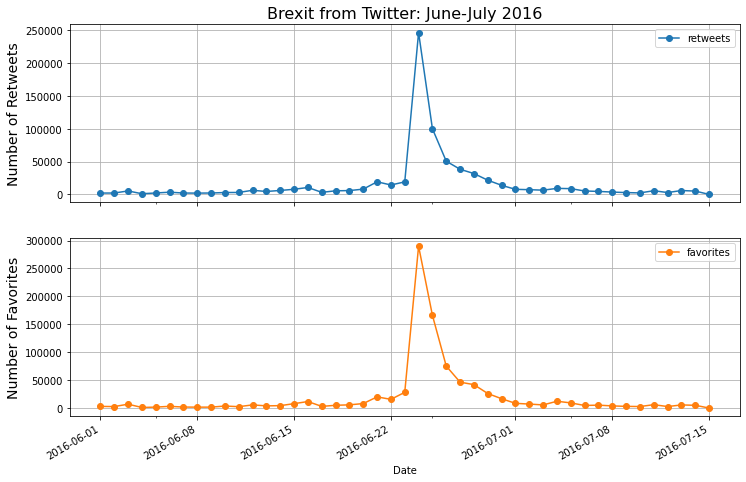

In [104]:
# Group by date
grouped = df.groupby('Date').sum()

axes = grouped[['retweets', 'favorites']].plot(subplots=True, figsize=(12,8), marker='o', grid=True)
axes[0].set_ylabel('Number of Retweets', fontsize=14)
axes[0].set_title('Brexit from Twitter: June-July 2016', fontsize=16)
axes[1].set_ylabel('Number of Favorites', fontsize=14)

plt.savefig('./fig/tweet/brexit_junejuly2016.pdf')

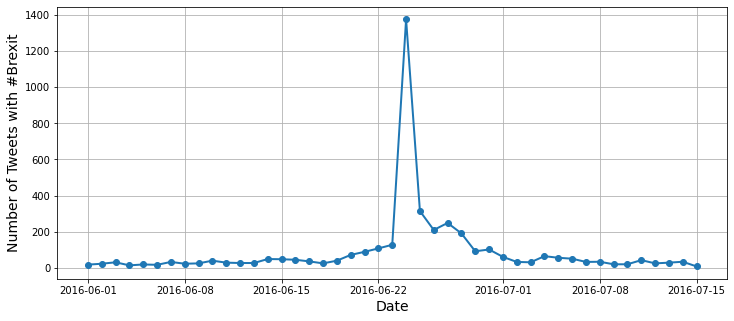

In [118]:
# Look at number of tweets with #Brexit hashtag 

num_tweets = df['hashtags'].str.contains('Brexit').groupby('Date').sum()
ax = num_tweets.plot(figsize=(12,5), marker='o', lw=2, grid=True)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Tweets with #Brexit', fontsize=14)
plt.savefig('./fig/tweet/num_tweets_with_brexithash.pdf')


## Get Most Frequently Used Words

Here, we analyze the most commonly used words in these tweets.

In [3]:
p = TweetProcessor(tweet_csv_file)

# Get 10 most common words used
# Stopwords are removed automatically
most_common_words = p.get_most_common_words(extra_words_to_remove=['brexit'])

b'Skipping line 408: expected 10 fields, saw 11\nSkipping line 536: expected 10 fields, saw 11\nSkipping line 1066: expected 10 fields, saw 12\nSkipping line 2172: expected 10 fields, saw 11\nSkipping line 2636: expected 10 fields, saw 11\nSkipping line 2809: expected 10 fields, saw 11\nSkipping line 4051: expected 10 fields, saw 11\nSkipping line 7702: expected 10 fields, saw 11\nSkipping line 7729: expected 10 fields, saw 11\nSkipping line 8348: expected 10 fields, saw 11\nSkipping line 9054: expected 10 fields, saw 11\n'


Processing tweet: 1521/9760

Processing tweet: 3024/9760

Processing tweet: 4441/9760

Processing tweet: 7404/9760

Processing tweet: 8857/9760

Processing tweet: 9760/9760


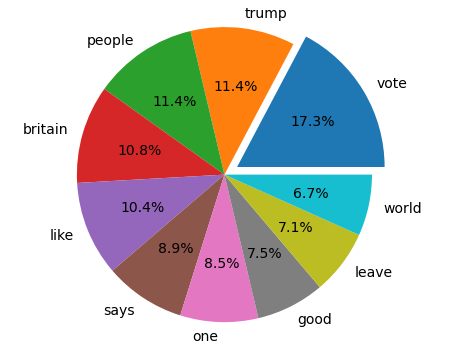

In [4]:
# Get a pie chart of most commonly used words

common_words, counts = most_common_words[:,0], most_common_words[:,1]

explode = [0.1] + [0]*9

fig, ax = plt.subplots(1,1,figsize=(8,6))
patches, texts, autotexts = ax.pie(counts, labels=common_words, autopct='%.1f%%', explode=explode)
ax.axis('equal')

for text, autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)
    
plt.savefig('./fig/tweet/brexit_pie_chart.pdf')